## Load packages

In [200]:
# Classifier imports
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
import sklearn #for building models
import sklearn.ensemble #for building models
from sklearn.model_selection import train_test_split #for creating a hold-out sample

import pylab as plt
import pandas as pd
import numpy as np

from joblib import dump, load

## Read in data

In [2]:
# Import paths
original_data = pd.read_csv("datasets/LISS_example_input_data.csv", encoding="cp1252") ##encoding="ISO-8859-1"

/var/folders/8y/1_ck288d22dfs261zphv69w40000gn/T/ipykernel_68763/2642771453.py:2: DtypeWarning: Columns (209,210,369,2824,2825,2826,2827,2828,2829,2830,4478,4479,4480,4481,4483,4484,4485,4486,4490,4491,4492,4493,4495,4496,4497,4498,4502,4503,4504,4505,4507,4508,4509,4510,4514,4515,4516,4517,4519,4520,4521,4522,5229,5231,5566,5567,5569,5570,5572,5573,5575,5576,5578,5579,5581,5582,5584,5585,5587,5588,5721,5722,5723,5724,5725,5726,5727,5728,5729,5730,6289,6290,6291,6292,6293,6294,6295,6296,6297,6298,6299,6502,6503,6504,6505,6506,6507,6508,6509,6510,6511,6512,6513,6514,6515,6516,6517,6518,6519,6520,6521,6522,6523,6524,6525,6526,6527,6528,6529,6530,6531,6532,6533,6534,6535,6536,6537,6538,6539,6540,6541,6542,6543,6544,6545,6546,6547,6548,6549,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6921,6922,6923,6924,6925,6926,6927,6928,6929,6930,6931,7020,7021,7022,7023,7024,7026,7027,7028,7029,7030,7247,7248,7249,7250,7251,7252,7253,7254,7255,7256,7257,7258,8586,8587,8588,8589,8590,8591,859

In [361]:
outcome = pd.read_csv("datasets/LISS_example_groundtruth_data.csv")
# Drop observations where the outcome is missing
y_isna = outcome['new_child'].isnull()
data = original_data.loc[~y_isna]
outcome = outcome.loc[~y_isna]

## Select variables

In [337]:
#check nas for each group

#keepcols=['herkomstgroep2010', 'herkomstgroep2011',
#'herkomstgroep2012', 'herkomstgroep2013', 'herkomstgroep2014',
#'herkomstgroep2015', 'herkomstgroep2016', 'herkomstgroep2017',
#'herkomstgroep2018', 'herkomstgroep2019']

#keepcols = ['oplmet2007','oplmet2008','oplmet2009','oplmet2010','oplmet2011','oplmet2012',
#            'oplmet2013', 'oplmet2014', 'oplmet2015', 'oplmet2016', 'oplmet2017', 
#            'oplmet2018', 'oplmet2019']
#data2 = data.loc[:, keepcols]
#data2.isna().sum()

In [408]:
#Select features from kbset
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.datasets import load_iris
#from sklearn.feature_selection import SelectFromModel
#clf = ExtraTreesClassifier(n_estimators=50)
#clf = clf.fit(X_train, y_train)
#clf.feature_importances_  

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")  
#pandas is just to set output to dataframe
#categorical_columns_selector = selector(dtype_include=object) #create selector for columns with type "object"
#categorical_columns = categorical_columns_selector(data)
#encoder.fit_transform(data[categorical_columns]) 

#X, y = load_digits(return_X_y=True)
#X_new = SelectKBest(chi2, k=20).fit_transform(data, outcome['new_child'])
#X_new.shape
dict_kids = {'None': 0, 'One child': 1, 'Two children': 2, 'Three children': 3, 'Four children': 4, 'Five children': 5, 'Six children': 6}
data["aantalki2019"] = data["aantalki2019"].map(dict_kids)

feature_test = Pipeline([
               ("preprocess", preprocessor),
               ("classifier", SelectKBest(chi2, k=50)) # LogisticRegression(max_iter=500)
               ]) 
feature_test.fit(data,outcome['new_child'])

#2nd way
data.columns[feature_test['classifier'].get_support(indices=True)].tolist()
#feature_test["classifier"].get_feature_names_out()
#feature_test["classifier"].columns[selector.get_support(indices=True)]

/var/folders/8y/1_ck288d22dfs261zphv69w40000gn/T/ipykernel_68763/3083807322.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["aantalki2019"] = data["aantalki2019"].map(dict_kids)
/Users/diannaamasino/anaconda3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


['geslacht',
 'nohouse_encr2007',
 'nohouse_encr2012',
 'nohouse_encr2013',
 'nohouse_encr2014',
 'nohouse_encr2016',
 'nohouse_encr2017',
 'nohouse_encr2018',
 'nohouse_encr2019',
 'wave2008',
 'wave2011',
 'wave2012',
 'wave2013',
 'wave2014',
 'wave2015',
 'wave2016',
 'wave2017',
 'wave2018',
 'wave2019',
 'positie2007',
 'positie2008',
 'positie2009',
 'positie2010',
 'positie2011',
 'positie2012',
 'positie2013',
 'positie2014',
 'positie2015',
 'positie2016',
 'positie2017',
 'positie2018',
 'positie2019',
 'leeftijd2007',
 'leeftijd2008',
 'leeftijd2009',
 'leeftijd2010',
 'leeftijd2011',
 'leeftijd2012',
 'leeftijd2014',
 'leeftijd2015',
 'leeftijd2016',
 'leeftijd2017',
 'leeftijd2018',
 'leeftijd2019',
 'lftdcat2007',
 'lftdcat2008',
 'lftdcat2009',
 'lftdcat2011',
 'lftdcat2012',
 'lftdcat2013']

In [407]:
#Select features from ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
#clf = ExtraTreesClassifier(n_estimators=50)
#clf = clf.fit(X_train, y_train)
#clf.feature_importances_  

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2


#X, y = load_digits(return_X_y=True)
#X_new = SelectKBest(chi2, k=20).fit_transform(data, outcome['new_child'])
#X_new.shape
dict_kids = {'None': 0, 'One child': 1, 'Two children': 2, 'Three children': 3, 'Four children': 4, 'Five children': 5, 'Six children': 6}
data["aantalki2019"] = data["aantalki2019"].map(dict_kids)

feature_test = Pipeline([
               ("preprocess", preprocessor),
               ("classifier", ExtraTreesClassifier(n_estimators=50)) # "classifier", SelectKBest(chi2, k=50)
               ]) 
feature_test.fit(data,outcome['new_child'])

print_sorted_importance(feature_test['classifier'].feature_importances_, data.columns)

#2nd way
#data.columns[feature_test['classifier'].get_support(indices=True)].tolist()
#feature_test["classifier"].get_feature_names_out()
#feature_test["classifier"].columns[selector.get_support(indices=True)]

/var/folders/8y/1_ck288d22dfs261zphv69w40000gn/T/ipykernel_68763/630187619.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["aantalki2019"] = data["aantalki2019"].map(dict_kids)


0.109: nohouse_encr2007                                  
0.046: nomem_encr                                        
0.044: gebjaar                                           
0.044: nohouse_encr2012                                  
0.035: nohouse_encr2018                                  
0.034: nohouse_encr2017                                  
0.032: wave2008                                          
0.029: nohouse_encr2019                                  
0.027: nohouse_encr2016                                  
0.026: wave2007                                          
0.026: nohouse_encr2010                                  
0.025: nohouse_encr2015                                  
0.025: geslacht                                          
0.024: leeftijd2016                                      
0.022: nohouse_encr2011                                  
0.021: leeftijd2011                                      
0.019: leeftijd2017                                      
0.019: nohouse

/Users/diannaamasino/anaconda3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [379]:
# Select predictors: education, year of birth, gender, number of children in the household 
# You can do this automatically (not necessarily better): https://scikit-learn.org/stable/modules/feature_selection.html
keepcols = ['gebjaar', 'geslacht', 'leeftijd2019', 'positie2019',
            'aantalhh2019','partner2019', 'sted2019', 'belbezig2019', 
            'nettohh_f2019', 'oplmet2019', 'herkomstgroep2019',
            'burgstat2019', 'woonvorm2019', 'aantalki2019', 'cf19l128',
           'cf19l131','cf19l132','cf19l133','cf19l134','woning2019', 
            'cf19l456', 'cw19l522', 'cr19l143', 'cr19l090',
            'cf19l483', 'cf19l484', 'cf19l485', 'cf19l486', 'cf19l487', 'cf19l488']
data2 = data.loc[:, keepcols]

X_train, X_test, y_train, y_test = train_test_split(data2,
                                                    outcome,
                                                    test_size=0.25, random_state=2023)
y_train = y_train["new_child"]
y_test = y_test["new_child"]

## Upsample data

In [380]:
#Upsample data to over-represent births in training data set
from sklearn.utils import resample
target_upsample, data_upsample = resample(y_train[y_train == 1],
                                          X_train[y_train == 1],
             replace=True,
             n_samples=int(len(y_train[y_train == 0])),
             random_state=42)
#add upsample to dataset
y_train2 = pd.concat([target_upsample, y_train[y_train==0]])
X_train2 = pd.concat([data_upsample, X_train[y_train==0]])


# 3. Pre-process and model
You may not want to include the preprocessing in the pipeline if it becomes too cumbersome

Make sure to use the scoring that you want to optimize in the search space

In [381]:
# An example of a preprocessing apart from the pipeline

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

#Convert # children string to number
dict_kids = {'None': 0, 'One child': 1, 'Two children': 2, 'Three children': 3, 'Four children': 4, 'Five children': 5, 'Six children': 6}
X_train2["aantalki2019"] = X_train2["aantalki2019"].map(dict_kids)

#Suggests that this might lead to a lot of debugging (not sure of alternatives though)
# Create transformers

#import sklearn_pandas
#from sklearn_pandas import CategoricalImputer
#>>> data = np.array(['a', 'b', 'b', np.nan], dtype=object)
#>>> imputer = CategoricalImputer()
#>>> imputer.fit_transform(data)
#array(['a', 'b', 'b', 'b'], dtype=object)
# Imputer are sometimes not necessary
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #applies most frequent category, not ideal #SimpleImputer(strategy='most_frequent')
    ('encoder', OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=50))]) 
#put variables with too few observations in separate category

numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()), #mean is not ideal, impute based on other vars #SimpleImputer(strategy="mean")
    ('scaler', MinMaxScaler())])#StandardScaler()

#data["Age"] = data["Age"].interpolate(method='linear', limit_direction='forward', axis=0)


# Use ColumnTransformer to apply the transformations to the correct columns in the dataframe
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, selector(dtype_exclude=object)(X_train2)),
        ('cat', categorical_transformer, selector(dtype_include=object)(X_train2))])

X_train2.head()

,gebjaar,geslacht,leeftijd2019,positie2019,aantalhh2019,partner2019,sted2019,belbezig2019,nettohh_f2019,oplmet2019,...,cf19l456,cw19l522,cr19l143,cr19l090,cf19l483,cf19l484,cf19l485,cf19l486,cf19l487,cf19l488
4692,1988,Male,31.0,Household head,Two persons,Yes,Very urban,Paid employment,5275.0,wo (university),...,NaN,NaN,1.0,NaN,4.0,3.0,4.0,2.0,3.0,5.0
278,1982,Male,37.0,Wedded partner,Four persons,Yes,Very urban,Paid employment,4300.0,"mbo (intermediate vocational education, US: ju...",...,2015.0,0.0,2.0,NaN,3.0,5.0,3.0,1.0,5.0,3.0
2111,1990,Male,29.0,Household head,Four persons,Yes,Not urban,Paid employment,5600.0,wo (university),...,2015.0,0.0,2.0,NaN,4.0,4.0,4.0,1.0,1.0,2.0
7267,1988,Male,31.0,Household head,Two persons,Yes,Slightly urban,Paid employment,3900.0,"hbo (higher vocational education, US: college)",...,NaN,0.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
5419,1990,Female,29.0,Wedded partner,Two persons,Yes,Slightly urban,Paid employment,4000.0,"mbo (intermediate vocational education, US: ju...",...,NaN,0.0,1.0,NaN,2.0,1.0,1.0,5.0,3.0,1.0


In [392]:
#Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Create pipeline
model = Pipeline([
               ("preprocess", preprocessor),
               ("classifier", GradientBoostingClassifier(n_estimators=1000, subsample=0.75, max_depth=7)) # LogisticRegression(max_iter=500)
               ]) 
                      
# Define the hyperparameters, this can include several classifiers, but will make it slow
# You can see different classifiers here: 
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
#Logistic regression has values that will allow for more or less regularization (min parameters)
parameters = [
    {'classifier': [GradientBoostingClassifier(n_estimators=1000, subsample=0.75, max_depth=7)], #'classifier': [RandomForestClassifier()],
     'classifier__learning_rate': [0.1]
    },
    
]


# to search over parameters 'classifier__C': np.logspace(-3, 3, 50) #regularization coefficient

# Perform hyperparameter tuning using cross-validation: https://scikit-learn.org/stable/modules/classes.html#hyper-parameter-optimizers
# Scoring metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
# f1 = f1 of the class labeled as 1 (i.e. kids)
grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring="f1", verbose=9) #n_jobs=-1 allows for multiprocessing
grid_search.fit(X_train2, y_train2)

# Keep best model (or define it from scratch with the best coefficients found)
best_model = grid_search.best_estimator_
#model.fit(X_train2, y_train2)
#best_model = model
best_model

#First iteration: learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.75
#Second iteration (only learning rate, max_depth): learning_rate = 0.2, max_depth = 7
#third iteration (only learning rate): learning_rate = 0.5, I think too high and will stick with default of 0.1
#Gives best C (complexity/regularization parameter)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/diannaamasino/anaconda3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/diannaamasino/anaconda3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/diannaamasino/anaconda3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/diannaamasino/anaconda3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/diannaamasino/anaconda3/envs/scikit-learn-course/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [Iterativ

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['gebjaar', 'leeftijd2019',
                                                   'nettohh_f2019',
                                                   'aantalki2019', 'cf19l128',
                                                   'cf19l131', 'cf19l132',
                                                   'cf19l133', 'cf19l134',
                                                   'cf19l456', 'cw19l522',
                                                   'cr19l143', 'cr19l090',
                                                   'cf19l483', 'cf19l484',
                                                   'cf19l485', 'cf19l486',
                                                   'cf19l...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 min_frequency=50))]),
                                                  ['geslacht', 'positie2019',
                                                   'aantalhh2019',
                                                   'partner2019', 'sted2019',
                                                   'belbezig2019', 'oplmet2019',
                                                   'herkomstgroep2019',
                                                   'burgstat2019',
                                                   'woonvorm2019',
                                                   'woning2019'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=7, n_estimators=1000,
                                            subsample=0.75))])

In [393]:
#Variable names in the data
#best_model
best_model["preprocess"].get_feature_names_out()

array(['num__gebjaar', 'num__leeftijd2019', 'num__nettohh_f2019',
       'num__cf19l128', 'num__cf19l131', 'num__cf19l132', 'num__cf19l133',
       'num__cf19l134', 'num__cf19l456', 'num__cw19l522', 'num__cr19l143',
       'num__cr19l090', 'num__cf19l483', 'num__cf19l484', 'num__cf19l485',
       'num__cf19l486', 'num__cf19l487', 'num__cf19l488',
       'cat__geslacht_Female', 'cat__geslacht_Male',
       'cat__positie2019_Child living at home',
       'cat__positie2019_Household head',
       'cat__positie2019_Unwedded partner',
       'cat__positie2019_Wedded partner',
       'cat__positie2019_infrequent_sklearn',
       'cat__aantalhh2019_Five persons', 'cat__aantalhh2019_Four persons',
       'cat__aantalhh2019_One person', 'cat__aantalhh2019_Three persons',
       'cat__aantalhh2019_Two persons',
       'cat__aantalhh2019_infrequent_sklearn', 'cat__partner2019_No',
       'cat__partner2019_Yes', 'cat__sted2019_Extremely urban',
       'cat__sted2019_Moderately urban', 'cat__sted20

In [394]:
def print_sorted_importance(importances, columns, codebook=None):
    for imp, var in sorted(zip(importances, columns))[::-1]:
        if codebook is not None:
            print(f"{imp:2.3f}: {codebook[var]:50.50s}")
        else:
            print(f"{imp:2.3f}: {var:50.50s}")

In [395]:
#Feature importance (not sure exactly what it does under the hood)
# GBT from scikit-learn
print_sorted_importance(best_model['classifier'].feature_importances_, X_train2.columns)#, codebook

0.260: positie2019                                       
0.172: nettohh_f2019                                     
0.069: gebjaar                                           
0.067: burgstat2019                                      
0.036: woonvorm2019                                      
0.034: geslacht                                          
0.026: leeftijd2019                                      
0.023: aantalki2019                                      
0.020: cf19l133                                          
0.019: cf19l132                                          
0.018: cf19l131                                          
0.016: cf19l128                                          
0.015: sted2019                                          
0.012: belbezig2019                                      
0.011: oplmet2019                                        
0.010: cf19l488                                          
0.009: herkomstgroep2019                                 
0.008: cw19l52

In [396]:
#Feature importance via permutation
from sklearn.inspection import permutation_importance
r = permutation_importance(best_model, X_test, y_test,
                            n_repeats=30,
                            random_state=0)

print_sorted_importance(r["importances_mean"], X_train2.columns)

0.057: cf19l128                                          
0.045: gebjaar                                           
0.041: leeftijd2019                                      
0.014: burgstat2019                                      
0.009: cf19l484                                          
0.008: cf19l456                                          
0.008: sted2019                                          
0.005: cf19l488                                          
0.003: cf19l483                                          
0.003: woning2019                                        
0.002: cf19l134                                          
0.001: cf19l487                                          
0.001: cf19l485                                          
0.000: positie2019                                       
0.000: partner2019                                       
0.000: aantalki2019                                      
-0.001: aantalhh2019                                      
-0.001: cf19l

In [ ]:
# permutation importance (how worse does model get without variable?)


# Evaluate the model

Note: The results below are not for LogisticRegression, are for a different model

In [397]:
X_test["aantalki2019"] = X_test["aantalki2019"].map(dict_kids)

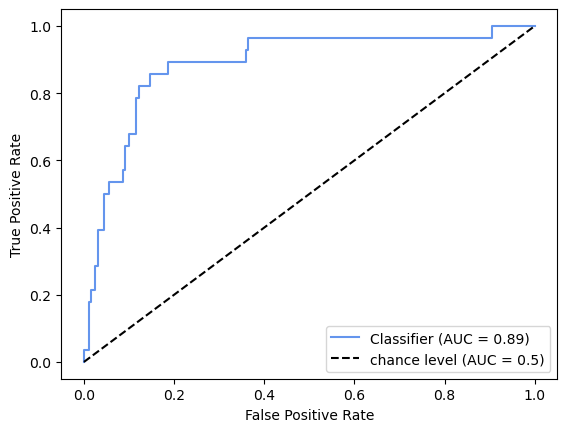

In [398]:
# Print ROC curve, it tells you how well you can balance false and true positives
RocCurveDisplay.from_predictions(
    y_test,
    best_model.predict_proba(X_test)[:, 1],
    color="cornflowerblue",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [399]:
# Create predictions
y_pred = best_model.predict(X_test)

# Report classification table
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       198
         1.0       0.47      0.64      0.55        28

    accuracy                           0.87       226
   macro avg       0.71      0.77      0.73       226
weighted avg       0.89      0.87      0.88       226

[CV 5/5] END classifier=GradientBoostingClassifier(max_depth=7, n_estimators=1000, subsample=0.75), classifier__learning_rate=0.1;, score=0.969 total time=   3.5s
[CV 1/5] END classifier=GradientBoostingClassifier(max_depth=7, n_estimators=1000, subsample=0.75), classifier__learning_rate=0.1;, score=0.961 total time=   3.5s


# rerun model on all given data

In [ ]:
#model.fit(X_train2, y_train2)
#best_model = model
#not for now

# Save model

In [372]:
import os
os.makedirs("../models", exist_ok=True)

# Dump model (don't change the name)
dump(best_model, "../models/model.joblib") #allows you to save and load model

['../models/model.joblib']

# For submission

In [373]:
test_data = pd.read_csv("datasets/LISS_test.csv", encoding="cp1252")

/var/folders/8y/1_ck288d22dfs261zphv69w40000gn/T/ipykernel_68763/3987700613.py:1: DtypeWarning: Columns (2824,2825,2826,2827,2828,2829,2830,5229,5231,5565,5571,5577,5583,6296,6298,6502,6503,6514,6515,6526,6527,6538,6539,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6921,6922,6924,6925,6926,6927,6929,6931,7025,7026,7247,7248,7249,7250,7251,7252,7253,7255,7256,7257,8586,8587,8588,8589,8590,8591,8592,8593,8594,8595,8596,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9774,9775,9786,9787,9798,9799,9810,9811,10032,10033,10034,10383,10384,10385,10386,10387,10388,10389,10390,10391,11465,11466,11467,11468,11469,11470,11472,11473,11474,11475,11718,11719,11720,11722,11725,11726,11727,11728,11729,11732,11739,12818,12819,12820,12821,12822,12823,12824,12825,12826,12827,15101,15102,15112,15113,15123,15124,15134,15135,15847,15853,15986,15987,15989,15990,15991,15992,15993,15994,15995,15996,16729,16730,16731,16732,16733,16734,16738,16806,16819,16820,16821,16822,16823,16828,16830,16964,1

In [376]:
def predict_outcomes(df):
    """Process the input data and write the predictions."""
    # Dictionary used
    dict_kids = {'None': 0, 'One child': 1, 'Two children': 2, 'Three children': 3, 'Four children': 4, 'Five children': 5, 'Six children': 6}
    
    # Keep 
    keepcols = ['gebjaar', 'geslacht', 'leeftijd2019',
            'aantalhh2019','partner2019', 'sted2019', 'belbezig2019', 
            'nettohh_f2019', 'oplmet2019', 'herkomstgroep2019',
            'burgstat2019', 'woonvorm2019', 'aantalki2019', 'cf19l128',
           'cf19l131','cf19l132','cf19l133','cf19l134','woning2019', 
            'cf19l456', 'cw19l522', 'cr19l143', 'cr19l090',
            'cf19l483', 'cf19l484', 'cf19l485', 'cf19l486', 'cf19l487', 'cf19l488']
    results = df[["nomem_encr"]]
    
    df = df.loc[:, keepcols]
    df["aantalki2019"] = df["aantalki2019"].map(dict_kids)
                            
    # Load your trained model from the models directory
    model_path = os.path.join(os.path.dirname(__file__), "..", "models", "model.joblib")
    model = load(model_path)

    # Use your trained model for prediction
    results.loc[:, "prediction"] = model.predict(df)

    #If you use predict_proba to get a probability and a different threshold
    #df["prediction"] = (df["prediction"] >= 0.5).astype(int)
    return results

In [375]:
__file__ = './' #this is not needed outside juypter notebooks
predict_outcomes(test_data)#original_data

/var/folders/8y/1_ck288d22dfs261zphv69w40000gn/T/ipykernel_68763/2957021232.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.loc[:, "prediction"] = model.predict(df)


,nomem_encr,prediction
0,800100,0.0
1,800372,1.0
2,800440,1.0
3,800445,0.0
4,800570,0.0
...,...,...
391,898675,0.0
392,898834,0.0
393,899076,0.0
394,899383,0.0


[CV 4/5] END classifier=GradientBoostingClassifier(max_depth=7, n_estimators=1000, subsample=0.75), classifier__learning_rate=0.1;, score=0.957 total time=   3.5s
[CV 1/5] END classifier=GradientBoostingClassifier(max_depth=7, n_estimators=1000, subsample=0.75), classifier__learning_rate=0.1;, score=0.952 total time=   3.5s
[CV 3/5] END classifier=GradientBoostingClassifier(max_depth=7, n_estimators=1000, subsample=0.75), classifier__learning_rate=0.1;, score=0.952 total time=   3.6s
[CV 2/5] END classifier=GradientBoostingClassifier(max_depth=7, n_estimators=1000, subsample=0.75), classifier__learning_rate=0.1;, score=0.969 total time=   3.6s
[CV 5/5] END classifier=GradientBoostingClassifier(max_depth=7, n_estimators=1000, subsample=0.75), classifier__learning_rate=0.1;, score=0.956 total time=   3.6s
